# Imports

In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Various Data Loads

In [ ]:
tips = sns.load_dataset("tips")
X = tips.drop(columns=["tip"])
y = tips["tip"]
display(X)
display(y)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names).join(
    pd.Series(iris["target"], name="species")
)

df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df

In [ ]:
df = pd.read_csv("./data/housing.csv")
df

# 18.1 NLP Introduction

Comparing to NLP to numerically driven ML

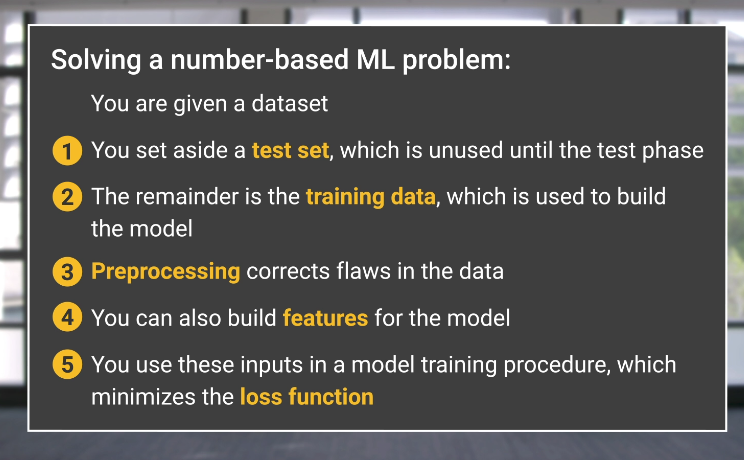

ML Workflow

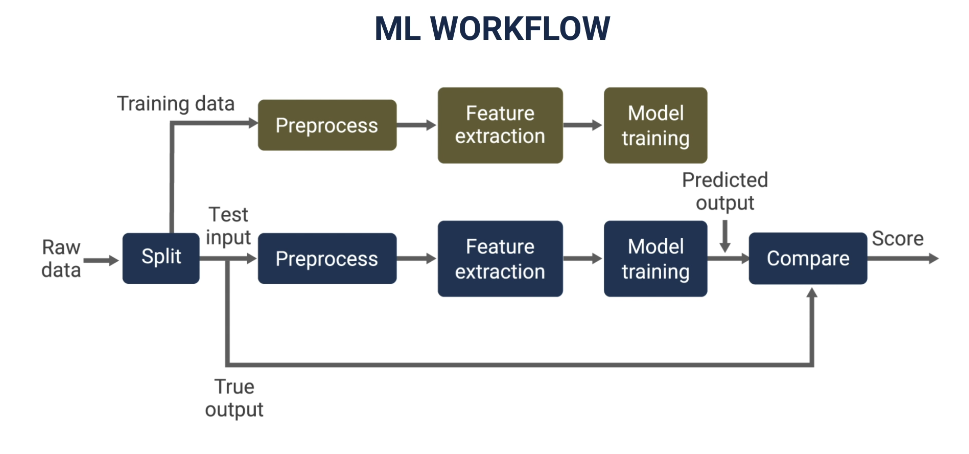

ML Workflow for NLP

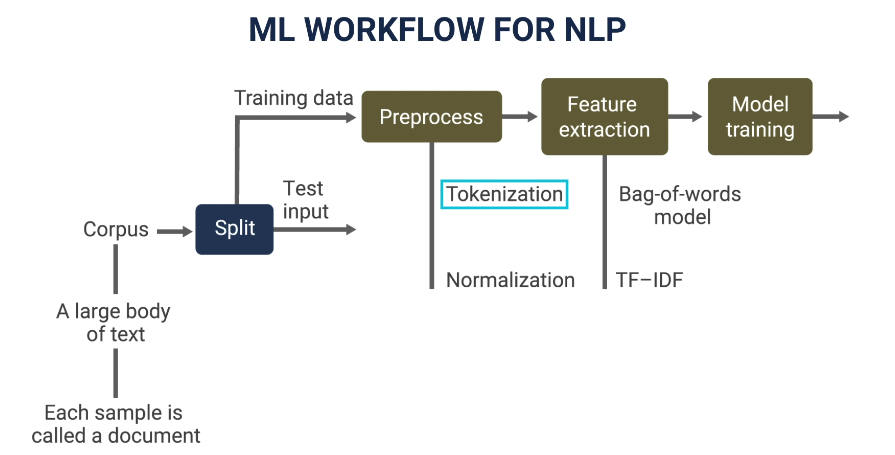

Pre-processing:
- Tokenization is splitting the text into separate grammatical units "tokens"
- Normalization reduces the tokens to core set that captures the important information in the document

Most popular python library for this type of processing is NLTK - natural language toolkit

# Overview - Preprocessing Text

In NLP, text preprocessing is the first step in cleansing text data and preparing it for the model. Text data can contain noise in various forms, such as emotion, punctuation, or case-sensitive text. Additionally, as any user of human language knows, a person can express the same idea in many ways, which can cause difficulty for machine learning models. For these reasons, and because computers generally cannot understand words, an efficient method of converting text into numbers is necessary.

The various text preprocessing steps are:

Tokenization
Lower casing
Stop words removal
Stemming
Lemmatization
Text preprocessing steps such as these are efficient in reducing data dimensionality. By reducing dimensions, text mining procedures can process data with fewer terms and improve the performance of clustering techniques.

# 18.2 NLTK Token

In [2]:
! pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 878.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 19.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.5 MB/s eta 0:00:00


In [35]:
import nltk

In [45]:
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download("tagsets")
nltk.download("punkt")
nltk.download("maxent_ne_chunker")
nltk.download("wordnet")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...


True

Starting with the tokenization part of pre-processing
- Token is a single unit of text
- What constitutes a token may change depending on goals, e.g. may be a word or may be a sentence

In [5]:
text = "I enjoyed 'Minority Report'. Tom Cruise didn't disappoint, and Steven Spielberg is at the top of his game. The movie was long but it wasn't boring. GREAT MOVIE!"

In [12]:
words = nltk.word_tokenize(text)
print(len(words))
print(words)

36
['I', 'enjoyed', "'Minority", 'Report', "'", '.', 'Tom', 'Cruise', 'did', "n't", 'disappoint', ',', 'and', 'Steven', 'Spielberg', 'is', 'at', 'the', 'top', 'of', 'his', 'game', '.', 'The', 'movie', 'was', 'long', 'but', 'it', 'was', "n't", 'boring', '.', 'GREAT', 'MOVIE', '!']


Tokenizers are language specific
- English is relatively easy
- But german or chinese can be much more difficult

After tokenization, tokens are combined and filtered to reveal identifiable structures in the text
- This is called normalization

# Overview - Normalization

Text normalization reduces variations in text forms, bringing it closer to a pre-defined "standard." In this way, you can reduce the amount of different information the computer must process and, therefore, improve its efficiency. Normalization techniques, such as stemming and lemmatization, also reduce inflectional and sometimes derived word forms to a single base form.

Text normalization includes:

Converting all letters to lowercase or uppercase
Converting numbers into words or removing numbers
Removing punctuations, accent marks, and other special characters
Removing white space
Expanding abbreviations
Removing stop words, sparse terms, and particular words
Canonicalizing text 

# 18.3 Normalization

Normalization takes tokens as input and returns tokens as output
- By contrast, feature extraction takes tokens and returns numbers

Common to remove special characters if they provide little information
- Such as $, &, @ should normally be removed
- Can also remove stop words: am, is, are, etc...
    - Because so common as to be uninformative
    - Scattered uniformly throughout text
    - Removal can actually improve the model


Remaining steps in normalization
- Parts of speech tagging
- Named entity recognition
- Stemming
- Lemmatization

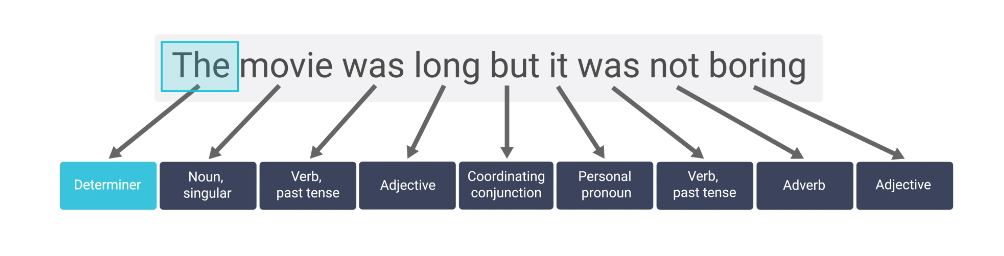

Parts of speech in a list of words can be identified using nltk.pos_tag

In [18]:
words_pos = nltk.pos_tag(words)
words_pos

[('I', 'PRP'),
 ('enjoyed', 'VBP'),
 ("'Minority", 'JJ'),
 ('Report', 'NNP'),
 ("'", 'POS'),
 ('.', '.'),
 ('Tom', 'NNP'),
 ('Cruise', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('disappoint', 'VB'),
 (',', ','),
 ('and', 'CC'),
 ('Steven', 'NNP'),
 ('Spielberg', 'NNP'),
 ('is', 'VBZ'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('top', 'NN'),
 ('of', 'IN'),
 ('his', 'PRP$'),
 ('game', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('movie', 'NN'),
 ('was', 'VBD'),
 ('long', 'RB'),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ("n't", 'RB'),
 ('boring', 'JJ'),
 ('.', '.'),
 ('GREAT', 'JJ'),
 ('MOVIE', 'NN'),
 ('!', '.')]

To understand what the tag names mean, use upenn_tagset

In [21]:
nltk.help.upenn_tagset("PRP$")

PRP$: pronoun, possessive
    her his mine my our ours their thy your


Next you can identify named entities
- These are noun phrases that denote particular kinds of things

Examples of common entity types shown below

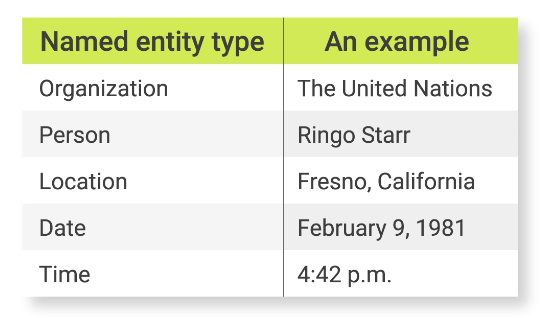

In [26]:
for t in nltk.ne_chunk(words_pos):
    if hasattr(t, "label"):
        print(t)

(ORGANIZATION Report/NNP)
(PERSON Tom/NNP Cruise/NNP)
(PERSON Steven/NNP Spielberg/NNP)
(ORGANIZATION GREAT/JJ)
(ORGANIZATION MOVIE/NN)


In [27]:
from nltk.corpus import stopwords

In [34]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Finally we can do stemming and lemmatization to replace groups of words with their root forms

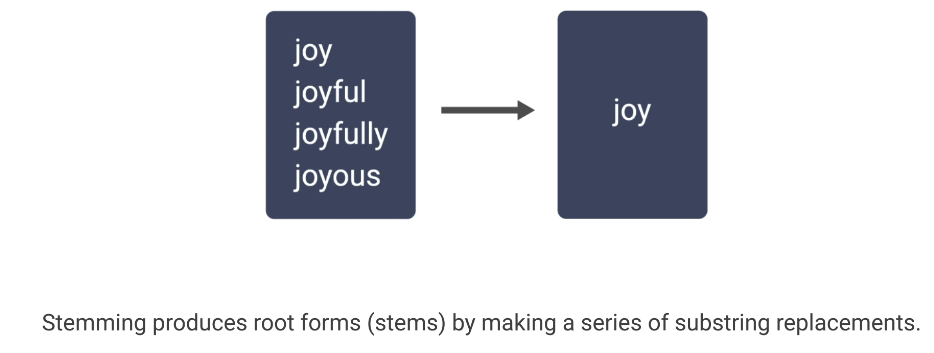

Example of stemming
- Notice that outputs are not necesarily real words, e.g. geese was mapped to gees

In [36]:
from nltk.stem import PorterStemmer

In [37]:
stemmer = PorterStemmer()

In [41]:
A = ["joy", "joyful", "joyfully", "joyous", "geese"]
[stemmer.stem(_) for _ in A]

['joy', 'joy', 'joy', 'joyou', 'gees']

Lemmatization is like stemming, however the outputs are required to be real words

In [42]:
from nltk.stem import WordNetLemmatizer

In [43]:
lemma = WordNetLemmatizer()

In [46]:
[lemma.lemmatize(_) for _ in A]

['joy', 'joyful', 'joyfully', 'joyous', 'goose']

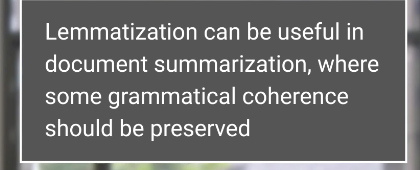

Comparing stemming vs lemma on the minority report movie review
- Stemming result is shorter and probably better for sentiment analysis

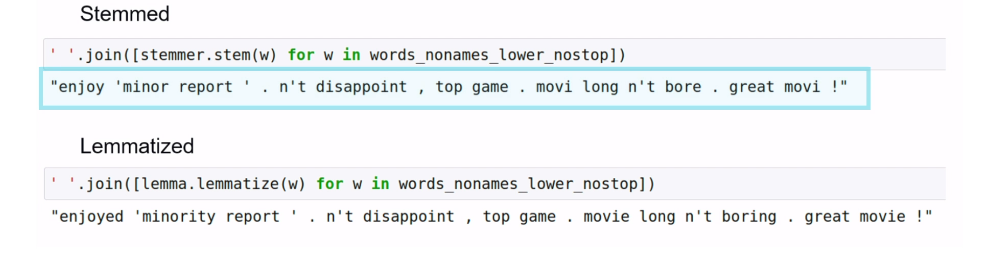

# Overview - Feature Extraction

The feature extraction step refers to extracting and producing feature representations appropriate for the required NLP task and the type of model used. Feature extraction techniques are necessary to convert text into features' matrices (or vectors). Some popular techniques for feature extraction are the bag-of-words model and term frequency-inverse document frequency (TF–IDF).

The bag-of-words model simplifies representations used in NLP. This model represents the text as a bag of words, disregarding grammar and even word order while retaining its multiplicity.

TF–IDF indicates the importance of a particular word to a document in a collection.

# 18.4 Feature Extraction, Bag of Words and TF-IDF

Feature extraction translates tokens into numbers
- Simpler is bag of words
- More complicated is TF-IDF
- Most complicated is full word vectorization

In bag of words, create a feature for every token in the data
- For each document, capture the number of occurences per token in that document
- Big drawback: order is discarded, so that for example "I had my car cleaned" is the same as "I had cleaned my car"
    - However, for some applications, that is not important
- Another drawback: does not track how informative words are
    - This is especially important when using a large document with thousands of feature columns

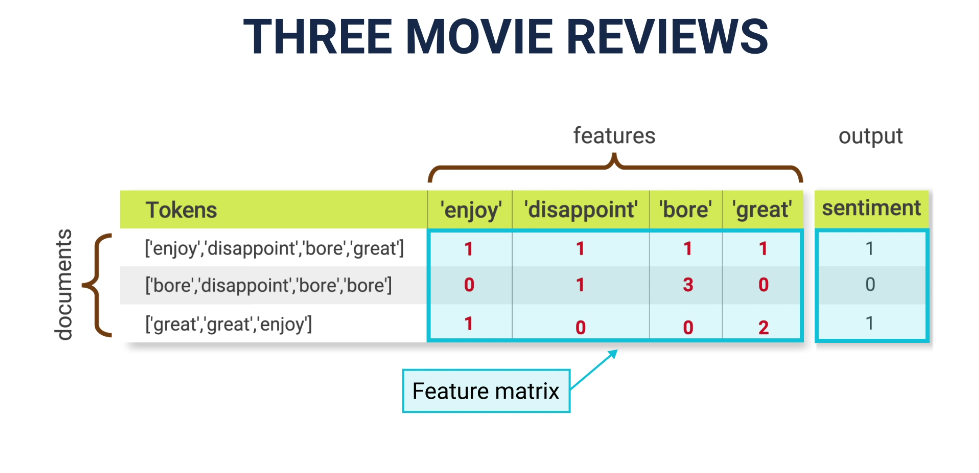

By contrast, TF-IDF quantifies the usefulness of each token

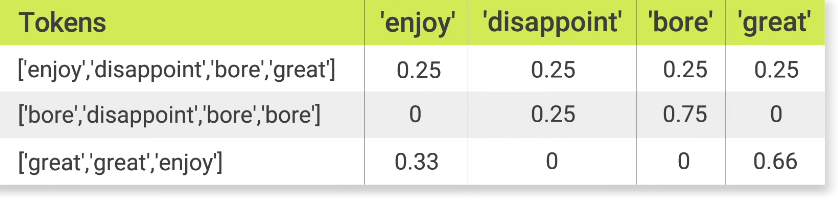

How is TF-IDF calculated?
- Product of term frequency tf and inverse document frequency idf

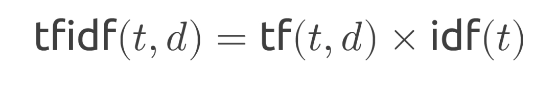

Here is how term frequency is calculated
- Notice that numerator is the bag of words count, so this becomes a normalized version of bag of words

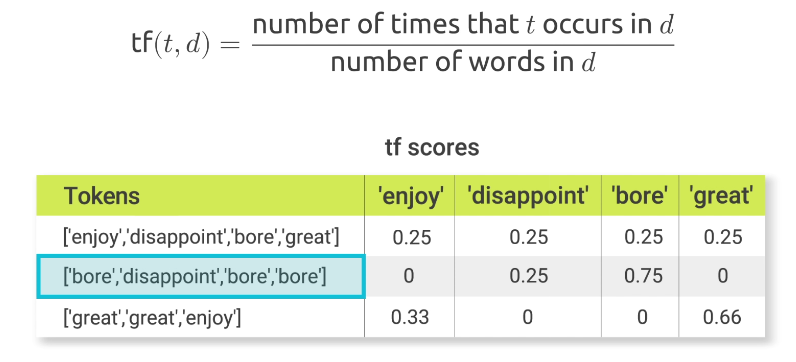

IDF captures the importance of a term by counting how often it appears across all documents
- IDF is always positive
- Amplifies very rare words
- And attenuates words that appear very often

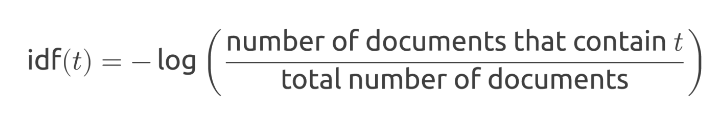

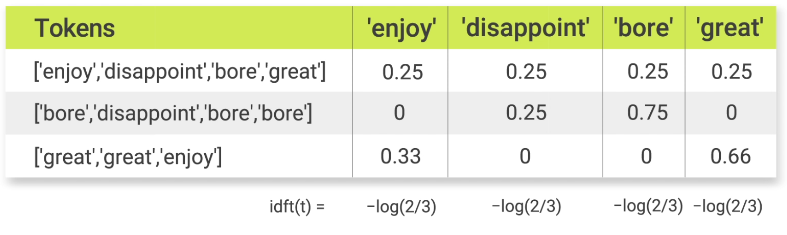

Having performed these steps, the data is now ready to be classified using any classifier we have covered